<a href="https://colab.research.google.com/github/turgonboyev/Google_Colab_uchun/blob/main/Reklamani_bashorat_qilish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.corrwith(df['Sales']).sort_values(ascending=True)

Newspaper    0.157960
Radio        0.349631
TV           0.901208
Sales        1.000000
dtype: float64

In [13]:
rek = df.copy()
rek.shape

(200, 4)

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(rek, test_size=0.10, random_state=42)

x_train = np.asanyarray(train_set[['TV']])
y_train = np.asanyarray(train_set[['Sales']])

In [15]:
from sklearn import linear_model

LR_model = linear_model.LinearRegression()

LR_model.fit(x_train, y_train)

LinearRegression()

In [16]:
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]

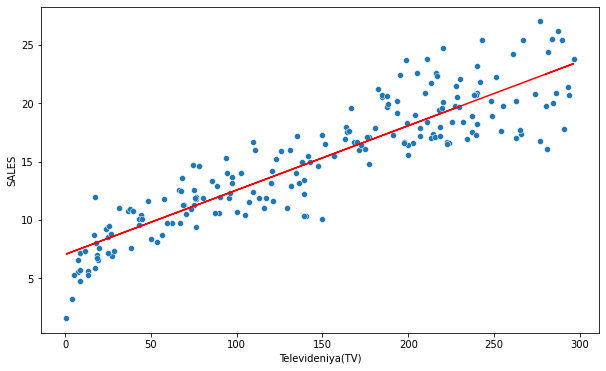

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rek, x='TV', y='Sales')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel('Televideniya(TV)')
plt.ylabel('SALES')
plt.show()

In [19]:
x_test = np.asanyarray(test_set[['TV']])
y_test = np.asanyarray(test_set[['Sales']])

y_predict = LR_model.predict(x_test)

In [20]:
y_test

array([[16.9],
       [22.4],
       [21.4],
       [ 7.3],
       [24.7],
       [12.6],
       [22.3],
       [ 8.4],
       [16.5],
       [16.1],
       [11. ],
       [ 8.7],
       [16.9],
       [ 5.3],
       [10.3],
       [16.7],
       [ 5.5],
       [16.6],
       [11.3],
       [18.9]])

In [21]:
y_predict

array([[16.04807507],
       [17.81783251],
       [23.19326401],
       [ 7.68996824],
       [19.19063502],
       [11.18537703],
       [18.99767081],
       [ 9.801548  ],
       [19.30641354],
       [16.69864011],
       [ 8.78159433],
       [10.14337031],
       [19.97351838],
       [ 7.34263267],
       [14.73591845],
       [16.42849022],
       [ 7.44738467],
       [17.9391243 ],
       [11.19640356],
       [20.13340301]])

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MEA = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))

In [23]:
MEA

2.037955356968121

In [24]:
RMSE

2.5103822386472214